In [2]:
import pandas as pd

file_path = r"C:\Users\HR\Desktop\Workspace\데이터톤\마케팅\merged_data.csv"
df = pd.read_csv(file_path)

print(df.head())

                  event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00+00:00       cart     5773203  1487580005134238553   
1  2019-10-01 00:00:03+00:00       cart     5773353  1487580005134238553   
2  2019-10-01 00:00:07+00:00       cart     5881589  2151191071051219817   
3  2019-10-01 00:00:07+00:00       cart     5723490  1487580005134238553   
4  2019-10-01 00:00:15+00:00       cart     5881449  1487580013522845895   

    brand  price    user_id                          user_session  \
0  runail   2.62  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885   
1  runail   2.62  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885   
2  lovely  13.48  429681830  49e8d843-adf3-428b-a2c3-fe8bc6a307c9   
3  runail   2.62  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885   
4  lovely   0.56  429681830  49e8d843-adf3-428b-a2c3-fe8bc6a307c9   

           event_time_moscow  event_month  \
0  2019-10-01 03:00:00+03:00         10.0   
1  2019-10-01 03:00:03+03:00         1

In [3]:
import pandas as pd

# CSV 또는 Parquet 파일을 불러온 뒤 df에 저장했다고 가정
# 예: df = pd.read_csv('your_file.csv') 또는 pd.read_parquet('your_file.parquet')

#  1. price가 0인 행 제거
df = df[df['price'] > 0]

#  2. brand 컬럼에서 결측치 제거
df = df.dropna(subset=['brand'])

# 결과 확인 (선택사항)
print(df.shape)
print(df['price'].min())
print(df['brand'].isnull().sum())


(11932733, 11)
0.06
0


# 할인(가격이 낮을수록) 구매 확률 높다?

In [4]:
# 필요한 라이브러리
import pandas as pd
import numpy as np

# 예시 컬럼: 'event_type', 'price', 'product_id', 'user_key'
# 구매 여부 컬럼 생성 (purchase: 1, 아니면 0)
df['is_purchase'] = (df['event_type'] == 'purchase').astype(int)


In [6]:
# 할인율 대신 'price' 그대로 사용해서 분석 진행
df['is_purchase'] = (df['event_type'] == 'purchase').astype(int)



In [7]:
import statsmodels.api as sm

# 독립변수: price / 종속변수: 구매 여부
X = df[['price']]
X = sm.add_constant(X)  # 절편 추가
y = df['is_purchase']

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.229279
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            is_purchase   No. Observations:             11932733
Model:                          Logit   Df Residuals:                 11932731
Method:                           MLE   Df Model:                            1
Date:                Tue, 29 Jul 2025   Pseudo R-squ.:                 0.01114
Time:                        14:36:02   Log-Likelihood:            -2.7359e+06
converged:                       True   LL-Null:                   -2.7668e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5179      0.002  -1663.691      0.000      -2.521      -2.515
price         -0.0309      0.

| 항목                 | 값       | 해석                           |
| ------------------ | ------- | ---------------------------- |
| `price coef`       | -0.0309 | 가격이 1 단위 오를 때 구매 확률은 **감소**함 |
| `p-value`          | 0.000   | 매우 유의미함 (통계적으로 확실한 관계)       |
| `Pseudo R-squared` | 0.01114 | 설명력은 낮지만, 이진 대용량에선 흔한 수준     |


C:\Users\HR\AppData\Local\Temp\ipykernel_12840\3287073484.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_rate_by_price = df.groupby('price_bin')['is_purchase'].mean().reset_index()
C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


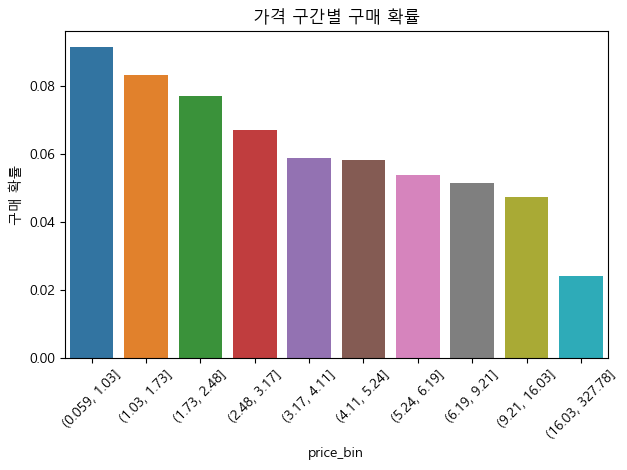

In [9]:
import matplotlib.pyplot as plt
import platform

# ✅ 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # Windows
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')    # macOS
else:
    plt.rc('font', family='NanumGothic')    # Linux (예: Colab)

# ✅ 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 가격 구간별 구매 비율 보기
df['price_bin'] = pd.qcut(df['price'], q=10)  # 10분위로 나눔
purchase_rate_by_price = df.groupby('price_bin')['is_purchase'].mean().reset_index()

# 시각화
sns.barplot(data=purchase_rate_by_price, x='price_bin', y='is_purchase')
plt.xticks(rotation=45)
plt.ylabel('구매 확률')
plt.title('가격 구간별 구매 확률')
plt.tight_layout()
plt.show()


# 해석
    price_bin이 높아질수록 (즉, 가격이 높을수록) 구매 확률이 뚜렷하게 낮아짐
    특히 마지막 구간 (16.03, 327.78]은 눈에 띄게 낮음 (고가 제품 거의 안 삼)
  #  📌 결론: 가격대별로도 명확한 하락 추세 확인됨
    → 정성적 추세가 정량적 분석과 일치

# 고가 제품은 구매 전 조회(view) 수가 많다?

In [14]:
# view 이벤트만 필터링
df_view = df[df['event_type'] == 'view'].copy()

# 제품별 조회 수
view_counts = df_view.groupby('product_id')['user_key'].nunique().reset_index()
view_counts.columns = ['product_id', 'view_count']

# 제품별 평균 가격
product_prices = df.groupby('product_id')['price'].mean().reset_index()

# 병합
view_price_df = pd.merge(view_counts, product_prices, on='product_id')


In [15]:
from scipy.stats import pearsonr

corr, pval = pearsonr(view_price_df['price'], view_price_df['view_count'])
print(f"📈 상관계수: {corr:.4f}, p-value: {pval:.4e}")


📈 상관계수: 0.0961, p-value: 4.2414e-64


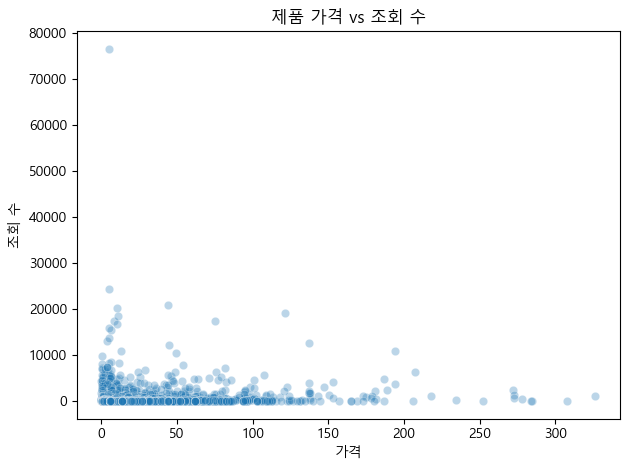

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=view_price_df, x='price', y='view_count', alpha=0.3)
plt.title('제품 가격 vs 조회 수')
plt.xlabel('가격')
plt.ylabel('조회 수')
plt.tight_layout()
plt.show()


| 지표              | 값                     | 해석                     |
| --------------- | --------------------- | ---------------------- |
| **상관계수 (corr)** | `0.0961`              | **양의 상관관계지만 매우 약함**    |
| **p-value**     | `4.24e-64`            | 통계적으로는 **유의미**함        |
| **산점도**         | 고가 제품은 조회수 **오히려 적음** | 대부분의 조회가 **저가 제품에 몰림** |


# 해석
    상관계수가 0.09면 → 거의 무시해도 될 정도로 약한 상관
    p-value는 작지만, 데이터 수가 너무 많아서 민감하게 반응한 것뿐이야
    → 통계적으로는 의미 있어도 실제로는 영향 거의 없음

    산점도에서도 보이듯이:
    고가 제품은 조회 수가 적은 경우가 대부분
    조회 수가 많은 건 1~30 사이 가격대 제품

# ✅ 결론
    **“고가 제품은 조회 수가 많다”**는 가설은
    ❌ 실제로는 지지되지 않는다 (상관은 거의 없음)

# remove_from_cart 비율은 가격이 높을수록 많다?

In [20]:
# ① remove_from_cart 이벤트 수
remove_counts = df[df['event_type'] == 'remove_from_cart'].groupby('product_id')['user_key'].nunique().reset_index()
remove_counts.columns = ['product_id', 'remove_count']

# ② cart 이벤트 수 (장바구니에 담긴 수)
cart_counts = df[df['event_type'] == 'cart'].groupby('product_id')['user_key'].nunique().reset_index()
cart_counts.columns = ['product_id', 'cart_count']

# ③ 제품별 평균 가격
product_prices = df.groupby('product_id')['price'].mean().reset_index()

# ④ 병합
cart_remove = pd.merge(cart_counts, remove_counts, on='product_id', how='left')
cart_remove = pd.merge(cart_remove, product_prices, on='product_id', how='left')

# NaN 처리 (remove 없는 경우는 0)
cart_remove['remove_count'] = cart_remove['remove_count'].fillna(0)

# ⑤ 이탈률 계산
cart_remove['remove_rate'] = cart_remove['remove_count'] / cart_remove['cart_count']


In [21]:
from scipy.stats import pearsonr

corr, pval = pearsonr(cart_remove['price'], cart_remove['remove_rate'])
print(f"📉 상관계수: {corr:.4f}, p-value: {pval:.4e}")


📉 상관계수: -0.0684, p-value: 3.5323e-28


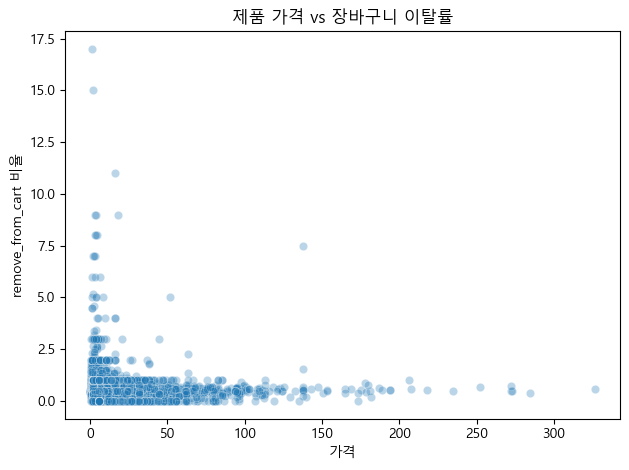

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=cart_remove, x='price', y='remove_rate', alpha=0.3)
plt.title('제품 가격 vs 장바구니 이탈률')
plt.xlabel('가격')
plt.ylabel('remove_from_cart 비율')
plt.tight_layout()
plt.show()


| 항목              | 값                            | 해석                                    |
| --------------- | ---------------------------- | ------------------------------------- |
| **상관계수 (corr)** | `-0.0684`                    | ❗ **음의 상관관계 (아주 약함)**                 |
| **p-value**     | `3.53e-28`                   | 📌 **통계적으로 유의미**함 (유의수준 0.05보다 훨씬 작음) |
| **그래프**         | 가격이 낮은 제품에서 이탈률이 **더 높은 패턴** |                                       |


# 해석
    상관계수가 음수라는 건:
    가격이 높을수록 오히려 이탈률은 낮아지는 경향이 있다는 뜻

    절댓값이 작음 (-0.06)
    → 관계는 매우 약하지만
    → 데이터 수가 많아서 p-value는 유의미

    그래프를 보면:
    저가(0~30) 구간에서 이탈률이 높게 퍼짐
    고가 구간일수록 이탈률은 낮은 수준에서 안정적

# ✅ 결론
    ❌ "가격이 높을수록 장바구니 이탈률이 높다"는 가설은
    ➤ 데이터상 지지되지 않음
    ➤ 오히려 반대로, 가격이 낮은 제품에서 이탈률이 더 높은 경향이 있음

# 중간 가격대 제품이 가장 높은 전환율을 가진다?

In [28]:
df['price_bin'] = pd.qcut(df['price'], q=10)  # 10분위로 나눔 (또는 q=5)


In [29]:
# View → Purchase 기준으로 전환율 계산
view_users = df[df['event_type'] == 'view'].groupby('price_bin')['user_key'].nunique()
purchase_users = df[df['event_type'] == 'purchase'].groupby('price_bin')['user_key'].nunique()

conversion_df = pd.DataFrame({
    'view': view_users,
    'purchase': purchase_users
}).fillna(0)

conversion_df['conversion_rate'] = conversion_df['purchase'] / conversion_df['view']
conversion_df = conversion_df.reset_index()


C:\Users\HR\AppData\Local\Temp\ipykernel_12840\3930214166.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  view_users = df[df['event_type'] == 'view'].groupby('price_bin')['user_key'].nunique()
C:\Users\HR\AppData\Local\Temp\ipykernel_12840\3930214166.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_users = df[df['event_type'] == 'purchase'].groupby('price_bin')['user_key'].nunique()


C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


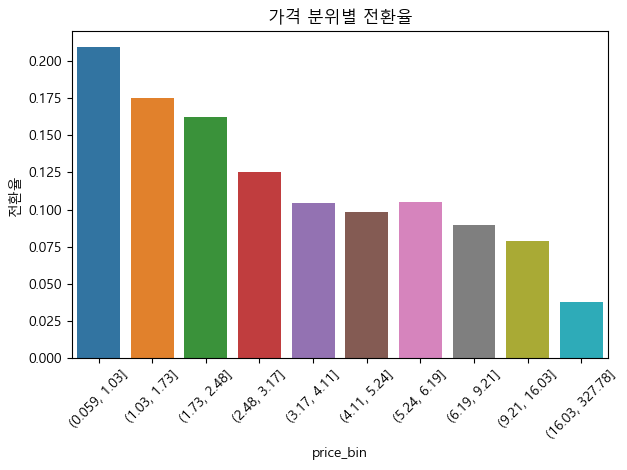

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=conversion_df, x='price_bin', y='conversion_rate')
plt.xticks(rotation=45)
plt.title('가격 분위별 전환율')
plt.ylabel('전환율')
plt.tight_layout()
plt.show()


# 해석
    가격이 낮을수록 전환율이 더 높음

    최저가 구간 (0.059–1.03) → 전환율 약 **20%**로 가장 높음

    이후 가격이 높아질수록 전환율은 점진적으로 하락

    **중간 가격대 (예: 2.48–4.11, 4.11–5.24)**는 오히려 낮음

    고가 구간 (16.03–327.78) → 전환율 최저

# ✅ 결론
    ❌ **"중간 가격대 제품이 가장 높은 전환율을 가진다"**는 가설은 지지되지 않음
    -> 오히려 저가 제품이 전환율이 가장 높고,
    -> 가격이 올라갈수록 전환율은 뚜렷하게 감소하는 하향 패턴